In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('owid-covid-data.csv', parse_dates=["date"], low_memory=False)

title_style = {'family': 'Arial', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 15 }

**(1)** Plot a bar chart for total cases of the 20 countries that have biggest numbers.

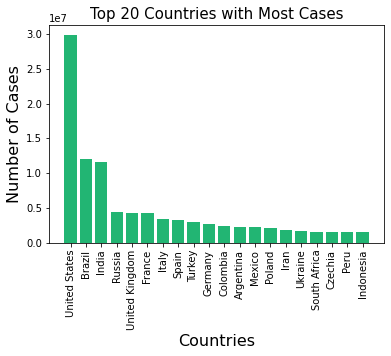

In [3]:
continents = ['World', 'Europe', 'North America', 'Asia', 'European Union', 'South America', 'Africa']
top20 = df[~df['location'].isin(continents)].groupby('location')['total_cases'].max().dropna().sort_values(ascending=False)[:20]
plt.title('Top 20 Countries with Most Cases',fontsize=15)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Number of Cases', fontsize=16)
plt.bar(top20.index, top20,color= '#22B573')
plt.xticks(rotation=90)
plt.show()

**(2)** Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

In [4]:
new_data=df[df['location']=='North America']

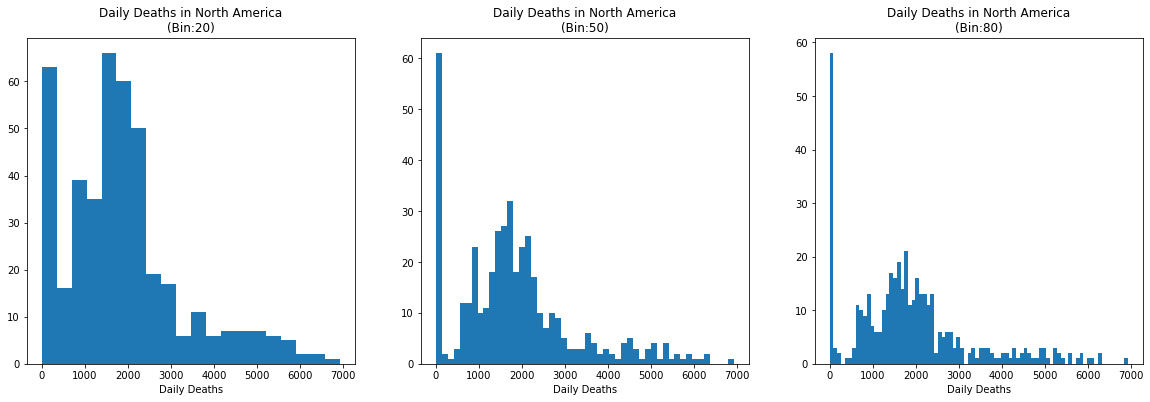

In [8]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.title('Daily Deaths in North America\n(Bin:20)')
plt.xlabel('Daily Deaths')
plt.hist(new_data.new_deaths.dropna(), bins=20)

plt.subplot(1, 3, 2)
plt.title('Daily Deaths in North America\n(Bin:50)')
plt.xlabel('Daily Deaths')
plt.hist(new_data.new_deaths.dropna(),bins=50)

plt.subplot(1, 3, 3)
plt.title('Daily Deaths in North America\n(Bin:80)')
plt.xlabel('Daily Deaths')
plt.hist(new_data.new_deaths.dropna(), bins=80)

plt.show()

**(3)** Plot a scatter plot of new cases and new death for Germany and France.

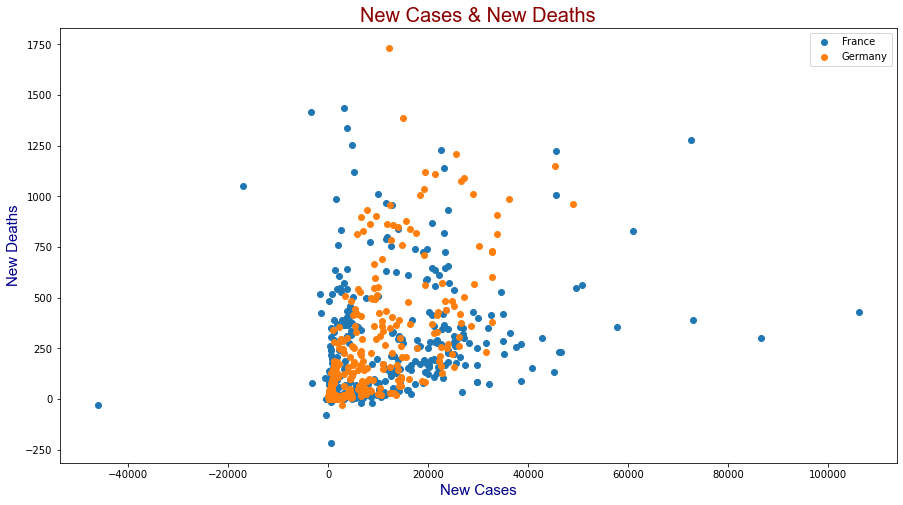

In [56]:
two_country = df[df['location'].isin(['France', 'Germany'])]
plt.figure(figsize=(15, 8))
plt.title('New Cases & New Deaths', fontdict=title_style)
for status in ['France', 'Germany']:
    plt.scatter(two_country[two_country['location'] == status].new_cases, two_country[two_country['location'] == status].new_deaths, label=status)
plt.xlabel('New Cases', fontdict=axis_style)
plt.ylabel('New Deaths', fontdict=axis_style)
plt.legend()
plt.show()

**(4)** Plot a boxplot for daily deaths for any country you choose.

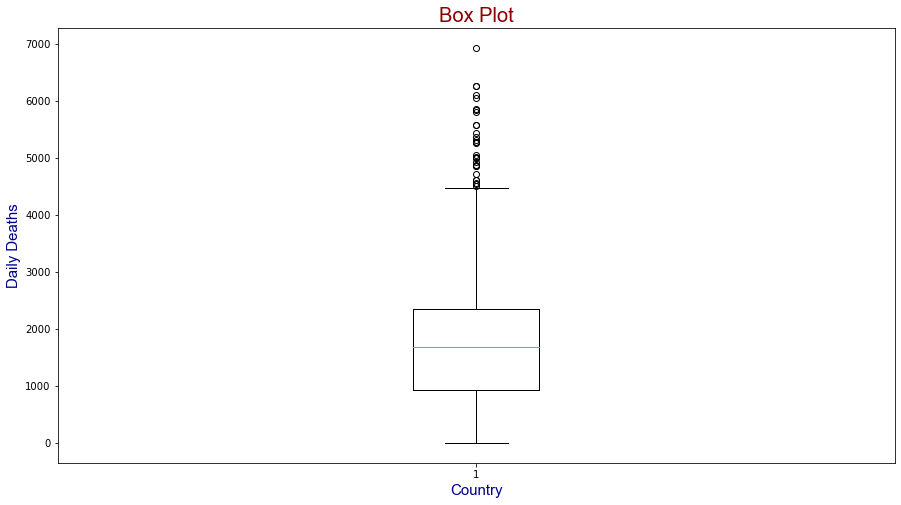

In [44]:
plt.figure(figsize=(15, 8))

plt.boxplot(new_data['new_deaths'].dropna())
plt.ylabel('Daily Deaths', fontdict = axis_style)
plt.xlabel('Country', fontdict = axis_style)
plt.title('Box Plot',fontdict = title_style)

plt.show()

**(5)** Calculate the total case for each continent and plot a pie chart 

In [46]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

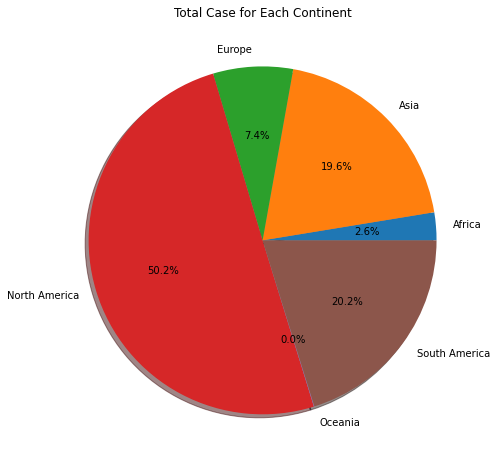

In [51]:
continent_cases = df.groupby('continent')['total_cases'].max()
plt.figure(figsize=(15, 8))
plt.title('Total Case for Each Continent')
plt.pie(continent_cases, labels=df.groupby('continent')['total_cases'].max().index, autopct='%1.1f%%', shadow=True)
plt.show()

In [53]:
continent_cases

continent
Africa            1537852.0
Asia             11646081.0
Europe            4407031.0
North America    29818528.0
Oceania             29206.0
South America    11998233.0
Name: total_cases, dtype: float64